# 보스턴 집값 예측

In [3]:
import pandas as pd

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
[each for each in boston.columns]

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [7]:
boston.rename(
    columns={'medv' : 'price'}, 
    inplace=True)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
import plotly.express as px

fig = px.histogram(boston, x='price')
fig.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston.corr().round(1)
corr_mat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.0,-0.2,0.4,-0.1,0.4,-0.2,0.4,-0.4,0.6,0.6,0.3,-0.4,0.5,-0.4
zn,-0.2,1.0,-0.5,-0.0,-0.5,0.3,-0.6,0.7,-0.3,-0.3,-0.4,0.2,-0.4,0.4
indus,0.4,-0.5,1.0,0.1,0.8,-0.4,0.6,-0.7,0.6,0.7,0.4,-0.4,0.6,-0.5
chas,-0.1,-0.0,0.1,1.0,0.1,0.1,0.1,-0.1,-0.0,-0.0,-0.1,0.0,-0.1,0.2
nox,0.4,-0.5,0.8,0.1,1.0,-0.3,0.7,-0.8,0.6,0.7,0.2,-0.4,0.6,-0.4
rm,-0.2,0.3,-0.4,0.1,-0.3,1.0,-0.2,0.2,-0.2,-0.3,-0.4,0.1,-0.6,0.7
age,0.4,-0.6,0.6,0.1,0.7,-0.2,1.0,-0.7,0.5,0.5,0.3,-0.3,0.6,-0.4
dis,-0.4,0.7,-0.7,-0.1,-0.8,0.2,-0.7,1.0,-0.5,-0.5,-0.2,0.3,-0.5,0.2
rad,0.6,-0.3,0.6,-0.0,0.6,-0.2,0.5,-0.5,1.0,0.9,0.5,-0.4,0.5,-0.4
tax,0.6,-0.3,0.7,-0.0,0.7,-0.3,0.5,-0.5,0.9,1.0,0.5,-0.4,0.5,-0.5


In [10]:
corr_mat[corr_mat > 0.5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.6,NaN,NaN,NaN,NaN
zn,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN
indus,NaN,NaN,1.0,NaN,0.8,NaN,0.6,NaN,0.6,0.7,NaN,NaN,0.6,NaN
chas,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,0.8,NaN,1.0,NaN,0.7,NaN,0.6,0.7,NaN,NaN,0.6,NaN
rm,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7
age,NaN,NaN,0.6,NaN,0.7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.6,NaN
dis,NaN,0.7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
rad,0.6,NaN,0.6,NaN,0.6,NaN,NaN,NaN,1.0,0.9,NaN,NaN,NaN,NaN
tax,0.6,NaN,0.7,NaN,0.7,NaN,NaN,NaN,0.9,1.0,NaN,NaN,NaN,NaN


<Axes: >

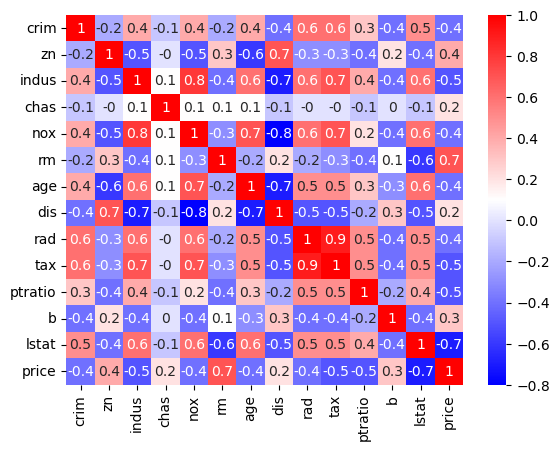

In [11]:
sns.heatmap(data=corr_mat, annot=True, cmap='bwr')

<Axes: xlabel='lstat', ylabel='price'>

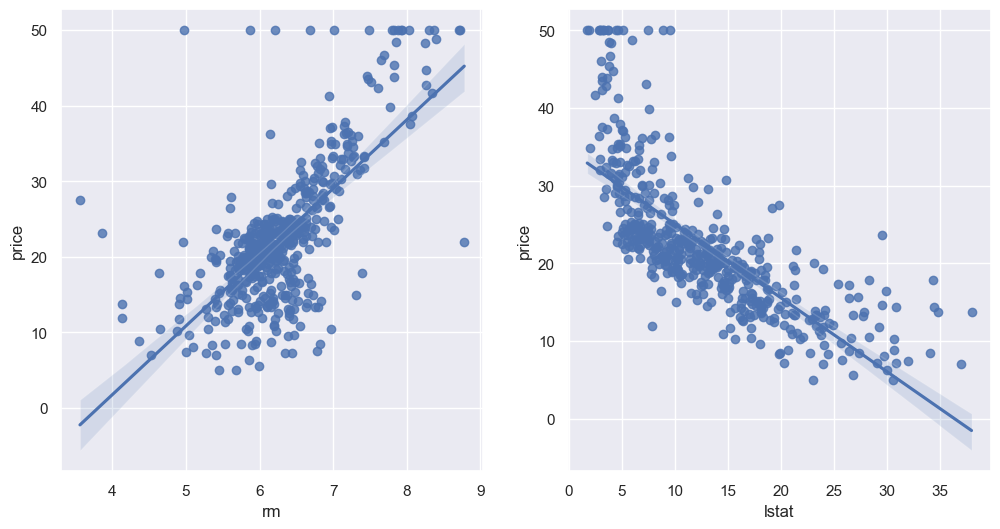

In [12]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize' : (12, 6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x='rm', y='price', data=boston, ax=ax[0])
sns.regplot(x='lstat', y='price', data=boston, ax=ax[1])

In [13]:
from sklearn.model_selection import train_test_split

x = boston.drop('price', axis=1)
y = boston['price']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=13)

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(x_train)
pred_test = reg.predict(x_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.642806069019824
RMSE of Test Data :  4.931352584146708


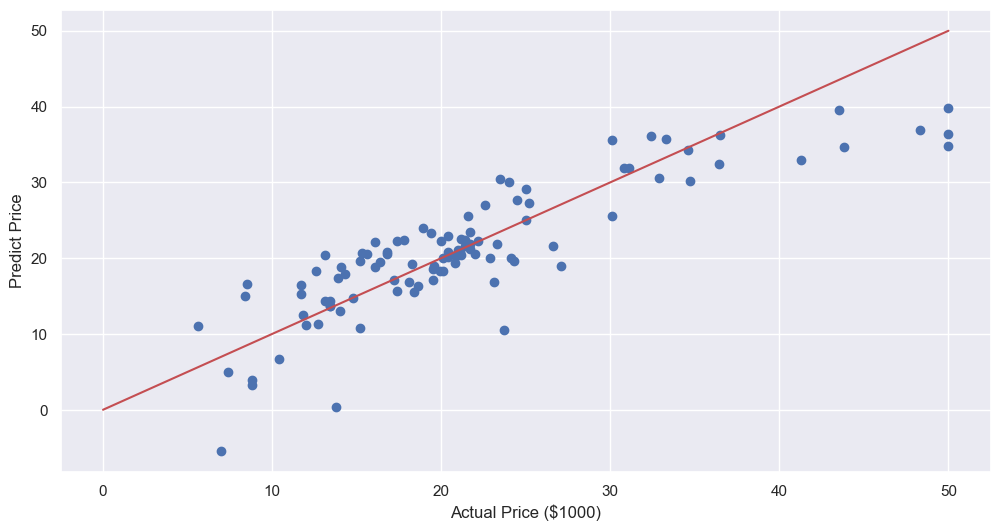

In [19]:
plt.scatter(y_test, pred_test)
plt.xlabel('Actual Price ($1000)')
plt.ylabel('Predict Price')
plt.plot([0, 50], [0, 50], 'r')
plt.show()